In [1]:
from gan.utils import *
from gan.gan import *

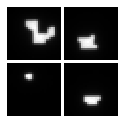

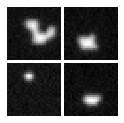

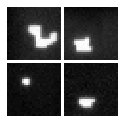

In [2]:
epid = EPID(batch_size=16, data_base_dir='data')
show_images(epid.X[:4])

phantom_fake = PHANTOM(batch_size=16, data_base_dir = 'data', fake=True) 
show_images(phantom_fake.X[:4])

phantom_real = PHANTOM(batch_size=16, data_base_dir = 'data', fake=False)
show_images(phantom_real.X[:4])

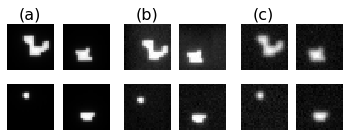

In [25]:
def show_images_all(images_set):
    images = images_set[0]
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))
    
    fig = plt.figure(figsize=(len(image_set) * sqrtn, sqrtn))
    outer_grid = gridspec.GridSpec(1, len(image_set)) # gridspec with two adjacent horizontal cells
    outer_grid.update(wspace=0.15, hspace=0.05)


    labels = ['(a)', '(b)', '(c)']

    for j, images in enumerate(image_set):
        cell = outer_grid[0,j] # the subplotspec within outer grid
#         gs = gridspec.GridSpecFromSubplotSpec(sqrtn, len(images), cell)
        gs = gridspec.GridSpecFromSubplotSpec(sqrtn, sqrtn, cell)
#         gs.update(wspace=0.05, hspace=0.05)
        
        images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
        
        
        for i, img in enumerate(images):
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            if i == 0:
                ax.set_title(labels[j], fontsize=16)
            plt.imshow(img.reshape([sqrtimg, sqrtimg]))
            
    return fig

a = epid.X[:4]
b = phantom_real.X[:4]
c = phantom_fake.X[:4]

image_set = [a, b, c]

fig = show_images_all(image_set)
fig.savefig('figures/data.png')